#  Titanic Survival Data Analysis
# A complete EDA (Exploratory Data Analysis) on Titanic Dataset using Python libraries like Pandas, Seaborn, and Matplotlib.


##  Step 1: Import Libraries

We'll use Pandas for data manipulation, Seaborn and Matplotlib for data visualization.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  Step 2: Load Dataset

We'll use the Titanic dataset from an online GitHub repository.


In [13]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


##  Step 3: Initial Exploration

We'll check the shape, data types, and missing values in the dataset.


In [14]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

##  Step 4: Handle Missing Values

- Fill missing `Age` with the mean
- Drop the `Cabin` column (too many missing)
- Fill missing `Embarked` with mode


In [15]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(columns=['Cabin'])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


##  Step 5: Encode Categorical Variables

Convert 'Sex' column to numeric format:
- male → 0
- female → 1


In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


##  Step 6: Verify Cleaned Data

Check for missing values again to confirm.


In [17]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


##  Step 7: Exploratory Data Analysis (EDA)
We'll now explore various relationships and distributions.


###  Survival Count
Shows how many survived vs did not survive.


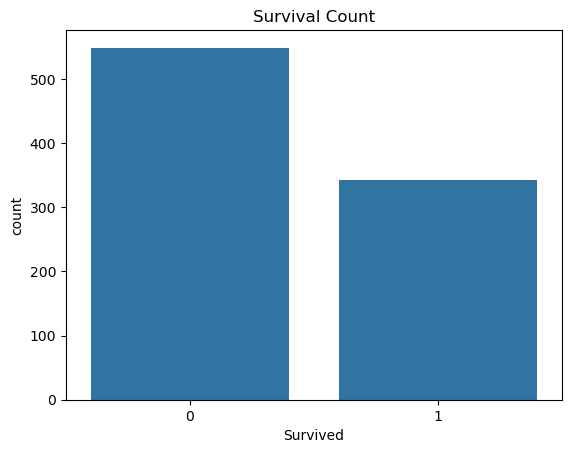

In [18]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()


###  Survival by Gender
Compare survival rate between males and females.


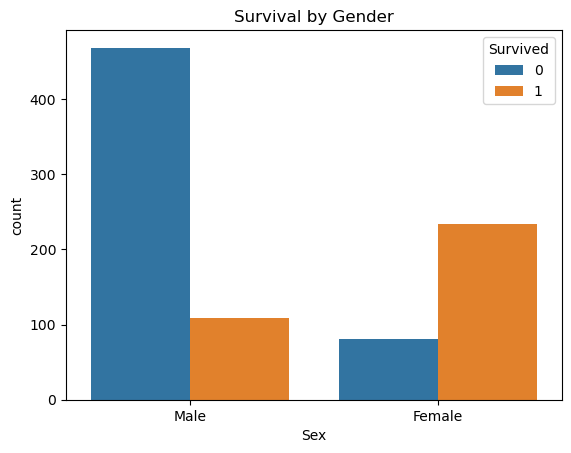

In [19]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


###  Age Distribution
Visualize the age distribution of passengers.


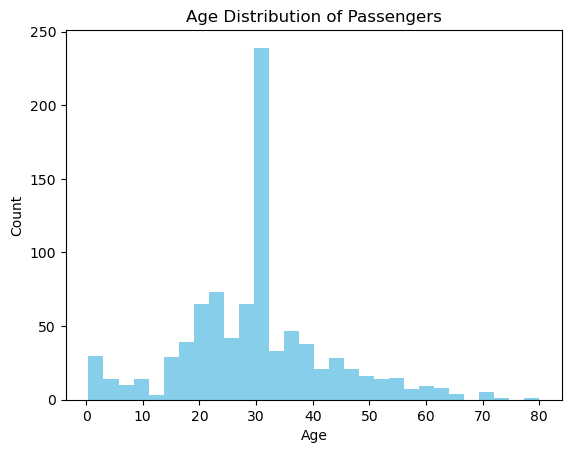

In [20]:
plt.hist(df['Age'], bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


###  Class Distribution
Visualize the number of passengers in each class (Pclass).


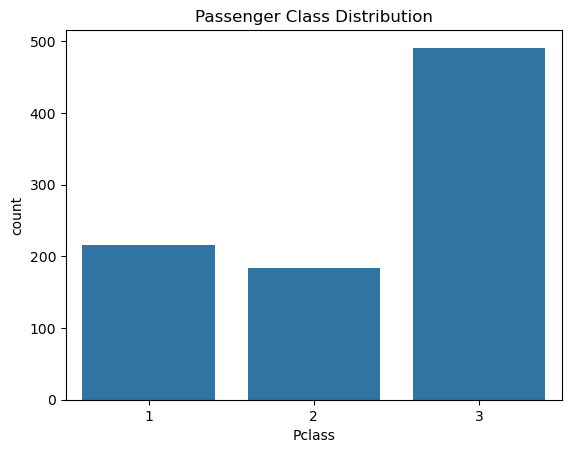

In [21]:
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()


###  Correlation Heatmap
Check correlations between numeric features (like Age, Fare, Survived).


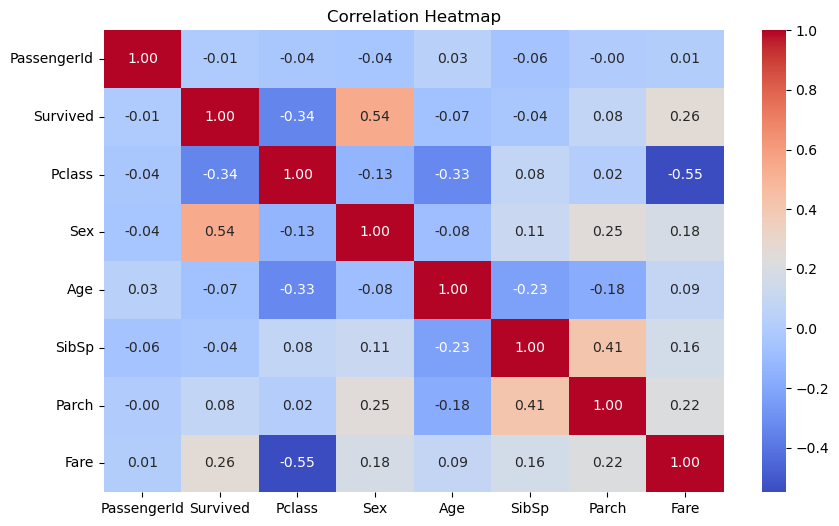

In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
